In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data set from lecture
dat = {'yield': [93.1, 93.6, 91.6, 92.5, 95.1, 94.6, 94.2, 91.9], 'catalyst': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B']}

# Create a data frame from the dat dictionary
df = pd.DataFrame(data=dat)
display(df)

,yield,catalyst
0,93.1,A
1,93.6,A
2,91.6,A
3,92.5,A
4,95.1,B
5,94.6,B
6,94.2,B
7,91.9,B


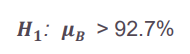
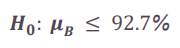

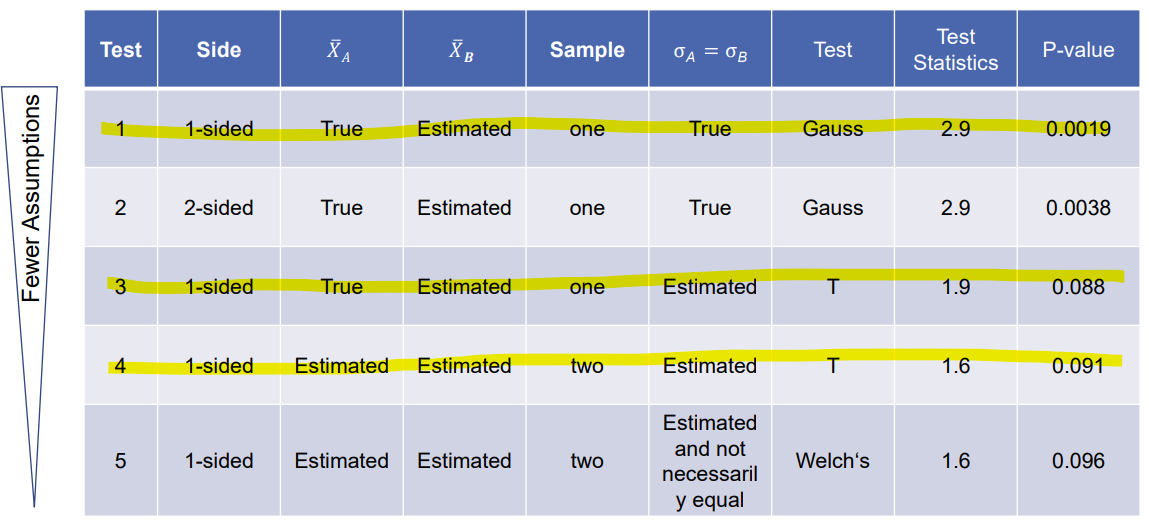
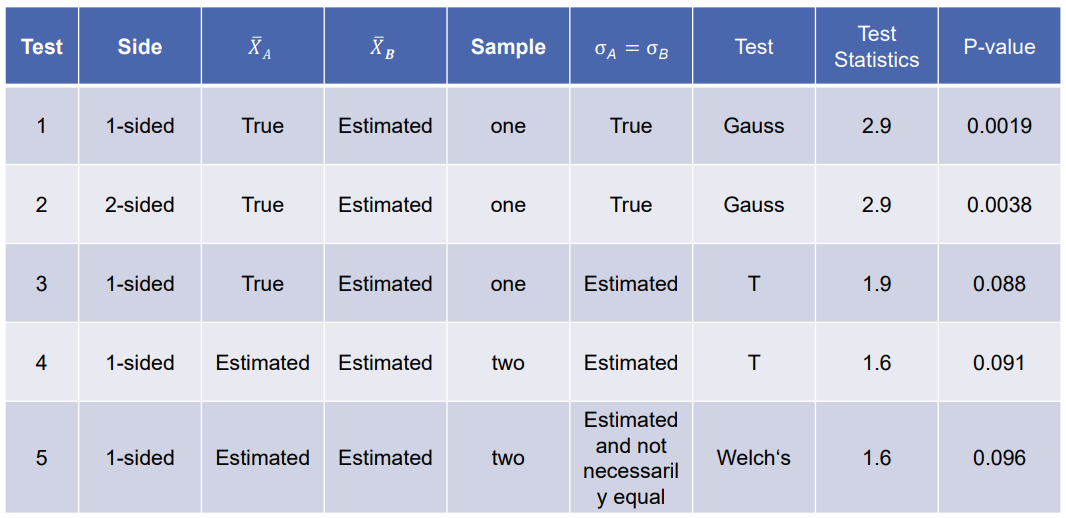

### Gauss test

One-sample test for comparing an estimated mean with known variance with an known population mean

In [3]:
# Population mean and standard deviation of catalyst A
mu_a = 92.7
sigma_a = 0.9

# Sample variance of mean of A based on the assuption that 4 samples are present
var_mean_a = np.sqrt(sigma_a**2/4)

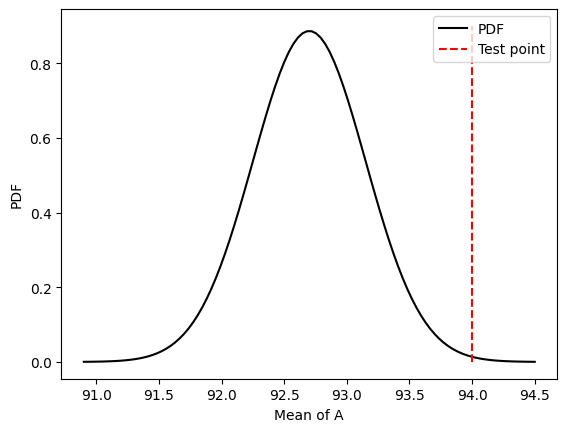

In [4]:
from scipy.stats import norm

# Plot of PDF of mean of A and test point (94%)
x = np.linspace(mu_a - 4*var_mean_a, mu_a + 4*var_mean_a, 100)
plt.plot(x, norm.pdf(x, loc=mu_a, scale=var_mean_a), 'k', label='PDF')
plt.vlines(94, 0.0, 0.9, colors='red', linestyles='--', label='Test point')
plt.xlabel('Mean of A')
plt.ylabel('PDF')
plt.legend()

In [5]:
# Calculation of Probability that mean of A is below 94%
# --> integral of PDF from -inf to 94%
# --> cumuative distribution function (CDF) at 94%
Pr = norm.cdf(94, loc=mu_a, scale=var_mean_a)

# P-value is 1-Pr since we want to have the Probability of mean of a larger than 94%
print(f'Probability of mean A larger 94% (H0): {1-Pr:.5f}')

Probability of mean A larger 94% (H0): 0.00193


In [6]:
# Standardization of rest point 94% --> point in standard normal distribution
z = (94-mu_a)/var_mean_a
print(f'Standardized test point: {z:.3f}')

Standardized test point: 2.889


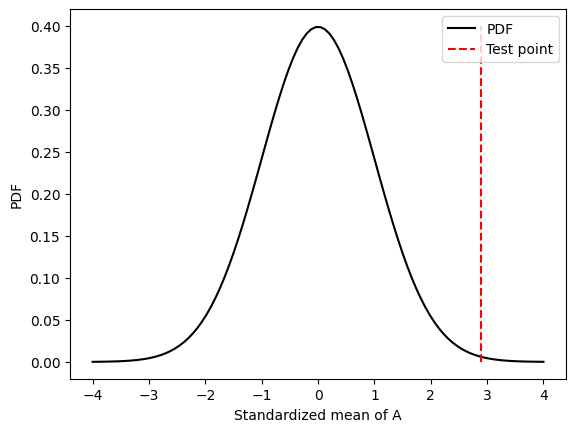

In [7]:
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x), 'k', label='PDF')
plt.vlines(z, 0.0, 0.4, colors='red', linestyles='--', label='Test point')
plt.xlabel('Standardized mean of A')
plt.ylabel('PDF')
plt.legend()

In [8]:
# Calculation of Probability that mean of A is below z
# --> integral of PDF from -inf to z
# --> cumuative distribution function (CDF) at z
Pr = norm.cdf(z)
print(f'Probability of mean A larger 94% (standardized): {1-Pr:.5f}')

Probability of mean A larger 94% (standardized): 0.00193


### T-tests

One-sample one-sided t-test comparing estimated mean and variance with the true population mean

In [9]:
from scipy.stats import ttest_1samp

# Population mean of a
pop_mean_a = 92.7

# Perform T-Test (test 3 from lecture): Null hypothesis: population mean of Cat A (popmean) is greater than the sample mean of Cat B (a)
stat, pval = ttest_1samp(a=df.loc[df['catalyst']=='B', 'yield'] , popmean=pop_mean_a, alternative='greater')
# stat, pval = ttest_1samp(a=df.loc[df['catalyst']=='B', 'yield'], popmean=pop_mean_a, alternative='greater')
print(f'Value of test statistic: {stat:.3f}\nP-value: {pval:5f}')

Value of test statistic: 1.766
P-value: 0.087760


Two-sample one-sided t-test comparing estimated mean and variance with estimated population mean

In [12]:
from scipy.stats import ttest_ind

# Perform T-Test: Null hypothesis: sample mean of Cat A (b) is greater than the sample mean of Cat B (a)
# equal_var=False --> T-Test (Test 4 from lecture)
# equal_var=True --> Welch's test (Test 5 from lecture)
stat, pval = ttest_ind(a=df.loc[df['catalyst']=='B', 'yield'], b=df.loc[df['catalyst']=='A', 'yield'], alternative='greater', equal_var=True)
print(f'Value of test statistic: {stat:.3f}\nP-value: {pval:5f}')

Value of test statistic: 1.509
P-value: 0.090969
